In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [2]:
y_train_onehot = pd.get_dummies(pd.DataFrame({"digit": y_train}), columns = ["digit"]).values
y_test_onehot = pd.get_dummies(pd.DataFrame({"digit": y_test}), columns = ["digit"]).values

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

In [3]:
print(f"{X_train.max()=}, {X_train.min()=}")

X_train.max()=255, X_train.min()=0


# Normalize data

$$X' = \frac{X}{X_{max}}$$

In [4]:
X_train = X_train.astype(np.float64) / 255
X_test = X_test.astype(np.float64) / 255

print(f"{X_train.max()=}, {X_train.min()=}")

X_train.max()=1.0, X_train.min()=0.0


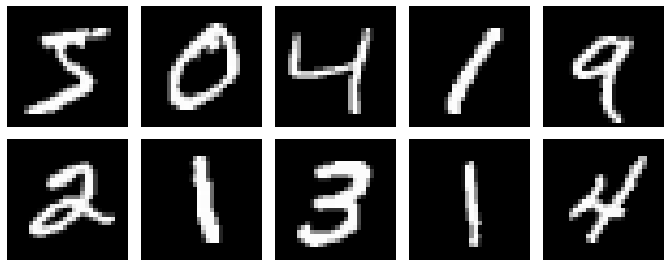

In [5]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap = "gray")
        ax.axis("off")

    fig.subplots_adjust(wspace = 0, hspace = .1, bottom = 0)

display_images(X_train)

## MLP

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "mlp_model")
    model.add(Flatten(input_shape = (28, 28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    
        
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

#model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations = ["softmax"])

#model_1.summary()

In [39]:
#model_1.fit(X_train, y_train, validation_split = 1/6, epochs = 20, verbose = 1)

In [40]:
#metrics = pd.DataFrame(model_1.history.history)

#metrics.index = range(len(metrics))

#metrics.head()

In [41]:
def plot_metrics(df_history, style = "-o"):
    _, axes = plt.subplots(1, 2, figsize = (12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y = col, xlabel = "Epochs", ylabel = col[0], ax = ax, style = style)

        ax.grid()

#plot_metrics(metrics)

## Hidden layers

In [32]:
model_2 = MLP_model(nodes = [128, 128, 10], activations = ["relu", "relu", "softmax"], names = ["hidden1", "hidden2", "output"])

model_2.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "mlp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 hidden2 (Dense)             (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2022-05-09 21:31:00.436184: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-09 21:31:00.436409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [33]:
model_2.fit(X_train, y_train, validation_split = 1/6, epochs = 3, verbose = 1)

Epoch 1/3


2022-05-09 21:31:05.890625: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-09 21:31:06.074491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 0.9257

2022-05-09 21:31:14.760002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 10s 6ms/step - loss: 0.2494 - accuracy: 0.9257 - val_loss: 0.1284 - val_accuracy: 0.9654
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1043 - accuracy: 0.9682 - val_loss: 0.0941 - val_accuracy: 0.9722
Epoch 3/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0709 - accuracy: 0.9778 - val_loss: 0.0936 - val_accuracy: 0.9722


In [112]:
metrics = pd.DataFrame(model_2.history.history)

metrics.index = range(len(metrics))

plot_metrics(metrics)

NameError: name 'plot_metrics' is not defined

In [113]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_2.predict(X_test)
y_pred[0]


2022-05-06 23:26:58.157630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([8.6858080e-08, 8.9964709e-07, 2.1652222e-06, 8.6986140e-05,
       5.8177013e-10, 5.2372215e-08, 8.8357273e-11, 9.9990320e-01,
       1.9002327e-07, 6.4735841e-06], dtype=float32)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.95      0.99      0.97       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



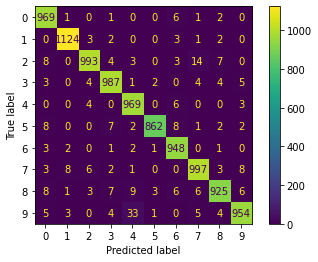

In [114]:
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [49]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]

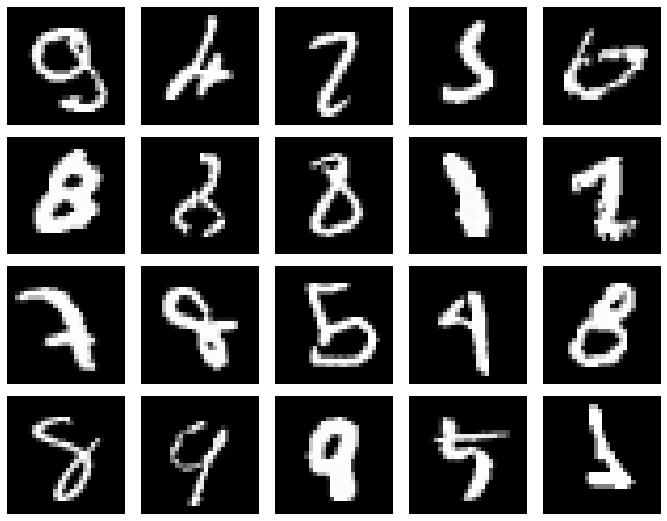

In [50]:

# a few misclassifications
display_images(misclassified_samples, 4,5, (12,8))

In [184]:
import math
import numpy as np

class VectorizedEvoClassifier:
    def __init__(self, n = 20, hidden_layers = False, activation = "sigmoid", random_state = None):

        self.n = n // 2 * 2
        self.best_net = -1
        self.best_result = None
        self.validation_loss_history = []
        self.training_loss_history = []
        self.mutation_sigma = 0

        if activation == "sigmoid":
            self.activation_function = lambda x: 1 / (1 + np.exp(-x))
        elif activation == "relu":
            self.activation_function = lambda x: np.maximum(0, x)
        elif activation == "leaky_relu":
            self.activation_function = lambda x: np.maximum(0.1 * x, x)
        
        self.output_activation_function = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)
        
        if hidden_layers:
            self.layers = hidden_layers + [10]
        else:
            self.layers = [10]
        
        if random_state != None:
            np.random.seed(random_state)

    
    def fit(self, X_train, y_train, epochs = 100, validation_data = False, verbose = 0):
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]

        if validation_data:
            X_val, y_val = validation_data

        self.layers = [X_train.shape[1]] + self.layers

        self.y_preds = np.zeros((self.n, y_train.shape[0]))
        self.nets_loss = np.zeros(self.n)
        self.sorted_indecies = np.zeros(self.n)

        self.weights = []

        for i in range(len(self.layers) - 1):
            self.weights += [np.random.uniform(-1, 1, (self.n, self.layers[i], self.layers[i + 1]))]

        for epoch in range(epochs):
            forward_pass = X_train.T
            
            for j in range(0, len(self.layers) - 2):
                forward_pass = self.activation_function(self.weights[j].transpose(0, 2, 1) @ forward_pass)

            forward_pass = self.output_activation_function(self.weights[-1].transpose(0, 2, 1) @ forward_pass)
            
            self.y_preds = forward_pass.reshape(self.n, -1)

            self.nets_loss = np.mean(np.abs(self.y_preds - y_train), axis = 1)
            
            
            self.sorted_indecies = np.argsort(self.nets_loss)

            self.mutation_sigma = 0.1 + 5 * 1 / math.exp(epoch / ((epochs + 1) / (100 * math.log10(epochs + 1))))

            for j in range(0, len(self.layers) - 1):
                self.weights[j][self.sorted_indecies[self.n // 2::2]] = np.mean((self.weights[j][self.sorted_indecies[:self.n // 2:2]], self.weights[j][self.sorted_indecies[1:1 + self.n // 2:2]]), axis = 0) + np.random.normal(0, self.mutation_sigma, (self.n // 4, self.layers[j], self.layers[j + 1]))
                self.weights[j][self.sorted_indecies[1 + self.n // 2::2]] = np.mean((self.weights[j][self.sorted_indecies[:self.n // 2:2]], self.weights[j][self.sorted_indecies[1:1 + self.n // 2:2]]), axis = 0) + np.random.normal(0, self.mutation_sigma, (self.n // 4, self.layers[j], self.layers[j + 1]))

            if self.best_net != self.sorted_indecies[0]:
                self.best_net = self.sorted_indecies[0]
                self.training_loss_history += [self.nets_loss[self.best_net]]
                
                if validation_data:
                    self.validation_loss_history += [np.mean(np.abs(y_val - self.predict(X_val)))]
                    if verbose == 1:
                        print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]} - val_loss: {self.validation_loss_history[-1]}")
                else:
                    if verbose == 1:
                        pass
                        print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]}")


    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        forward_pass = X.T
        for j in range(0, len(self.layers) - 2):
            forward_pass = self.activation_function(self.weights[j][self.best_net].T @ forward_pass)

        forward_pass = self.output_activation_function(self.weights[-1][self.best_net].T @ forward_pass)
        return forward_pass.reshape(-1)



In [186]:
classifier = VectorizedEvoClassifier(n = 1, hidden_layers = [64], activation = "relu", random_state = 42)
classifier.fit(X_train.reshape(-1, 28 * 28), y_train_onehot, epochs = 1000, verbose = 1)

/var/folders/xz/f2gwbn5n3vs4pz044n49z3cw0000gn/T/ipykernel_1401/2165102959.py:21: RuntimeWarning: overflow encountered in exp
  self.output_activation_function = lambda x: 1 / (1 + np.exp(-x))


Epoch 0 - loss: 0.29421671368928914
Epoch 1 - loss: 0.2635065011295324
Epoch 5 - loss: 0.2577162782374886
Epoch 6 - loss: 0.2318312351032709
Epoch 7 - loss: 0.19927911788935723
Epoch 9 - loss: 0.1819242212080481
Epoch 10 - loss: 0.1778789383050943
Epoch 11 - loss: 0.170292617116794
Epoch 12 - loss: 0.16098163439461666
Epoch 13 - loss: 0.1432018262963709
Epoch 14 - loss: 0.1372708740126222
Epoch 15 - loss: 0.1296998675440943
Epoch 16 - loss: 0.12497968889155864
Epoch 17 - loss: 0.1130190992467419
Epoch 18 - loss: 0.1081402441293143
Epoch 20 - loss: 0.10273354911650316
Epoch 23 - loss: 0.10237870201789923
Epoch 24 - loss: 0.10093426084162681
Epoch 25 - loss: 0.09864373741280771
Epoch 28 - loss: 0.09670009369663206
Epoch 36 - loss: 0.09574728521424121
Epoch 38 - loss: 0.0943170264995266
Epoch 41 - loss: 0.09341179103447027
Epoch 42 - loss: 0.09338547787909875
Epoch 43 - loss: 0.0926405201652858
Epoch 44 - loss: 0.09263192078688826
Epoch 45 - loss: 0.09257245393018323
Epoch 46 - loss: 0.09

In [188]:
y_pred = classifier.predict(X_test.reshape(-1, 28 * 28))

/var/folders/xz/f2gwbn5n3vs4pz044n49z3cw0000gn/T/ipykernel_1401/2165102959.py:21: RuntimeWarning: overflow encountered in exp
  self.output_activation_function = lambda x: 1 / (1 + np.exp(-x))


In [189]:
y_pred.shape

(10000, 10)

In [197]:
y_pred[1]

4

In [192]:
y_pred = np.argmax(y_pred, axis = 1)

In [196]:
y_test_onehot[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [194]:
y_pred

array([4, 4, 1, ..., 4, 4, 4])

In [173]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       980
           1       0.01      0.01      0.01      1135
           2       0.15      0.97      0.26      1032
           3       0.06      0.01      0.02      1010
           4       0.23      0.01      0.01       982
           5       0.10      0.05      0.07       892
           6       0.36      0.04      0.07       958
           7       0.12      0.02      0.03      1028
           8       0.07      0.00      0.01       974
           9       0.09      0.03      0.05      1009

    accuracy                           0.12     10000
   macro avg       0.13      0.12      0.06     10000
weighted avg       0.13      0.12      0.06     10000



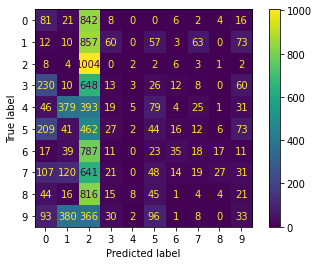

In [179]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [104]:
import math

class VectorizedEvoClassifier:
    def __init__(self, n = 20, hidden_layers = False, activation = "relu", random_state = None):

        self.n = n // 2 * 2
        self.validation_loss_history = []
        self.training_loss_history = []
        self.random_state = random_state
        self.activation = activation
        self.number_of_layers = 0
        
        if hidden_layers:
            self.layers = hidden_layers + [10]
        else:
            self.layers = [10]

    def fit(self, X_train, y_train, epochs = 100, validation_data = False, verbose = 0):

        if self.random_state != None:
            np.random.seed(self.random_state)

        if validation_data:
            X_val, y_val = validation_data

        if self.activation == "sigmoid":
            activation_function = lambda x: 1 / (1 + np.exp(-x))
        elif self.activation == "leaky_relu":
            activation_function = lambda x: np.maximum(0.1 * x, x)
        else:
            activation_function = lambda x: np.maximum(0, x)

        #output_activation_function = lambda x: 1 / (1 + np.exp(-x))
        output_activation_function = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 2, keepdims = True)

        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        y_train = y_train.astype("int8")

        n = self.n
        layers = [X_train.shape[1]] + self.layers
        number_of_layers_minus_one = len(layers) - 1
        y_preds = np.zeros((n, y_train.shape[0], y_train.shape[1]))
        nets_loss = np.zeros(n)
        sorted_indecies = np.arange(-(n // 2), n, 1)
        #sorted_indecies = np.zeros(n)
        best_net_index = -1
        weights = []

        for i in range(number_of_layers_minus_one):
            weights += [np.random.normal(0, 1, (n, layers[i], layers[i + 1]))]

        for epoch in range(epochs):
            forward_pass = X_train.T
            
            for j in range(number_of_layers_minus_one - 1):
                forward_pass = activation_function(weights[j][sorted_indecies[n // 2:]].transpose(0, 2, 1) @ forward_pass)
            
            forward_pass = weights[-1][sorted_indecies[n // 2:]].transpose(0, 2, 1) @ forward_pass
            
            y_preds[sorted_indecies[n // 2:]] = output_activation_function(forward_pass.transpose(0, 2, 1))

            nets_loss[sorted_indecies[n // 2:]] = np.mean(np.sum(-y_train * np.log10(y_preds[sorted_indecies[n // 2:]]), axis = 2), axis = 1)

            sorted_indecies = np.argsort(nets_loss)

            mutation_sigma = 0.08 + 0.5 * 1 / math.exp(epoch / ((epochs + 1) / (60 * math.log10(epochs + 1))))

            for j in range(number_of_layers_minus_one):
                weights[j][sorted_indecies[n // 2::2]] = (weights[j][sorted_indecies[:n // 2:2]] + weights[j][sorted_indecies[1:1 + n // 2:2]]) / 2 + np.random.normal(0, mutation_sigma, (n // 4, layers[j], layers[j + 1]))
                weights[j][sorted_indecies[1 + n // 2::2]] = (weights[j][sorted_indecies[:n // 2:2]] + weights[j][sorted_indecies[1:1 + n // 2:2]]) / 2 + np.random.normal(0, mutation_sigma, (n // 4, layers[j], layers[j + 1]))

            if best_net_index != sorted_indecies[0]:
                best_net_index = sorted_indecies[0]
                self.training_loss_history += [nets_loss[best_net_index]]
                

                self.best_net_weights = []
                for j in range(number_of_layers_minus_one):
                    self.best_net_weights += [weights[j][best_net_index]]
                
                if validation_data:
                    self.validation_loss_history += [np.mean(np.abs(y_val - self.predict(X_val)))]
                    if verbose == 1:
                        print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]} - val_loss: {self.validation_loss_history[-1]}")
                else:
                    if verbose == 1:
                        pass
                        print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]} - {mutation_sigma}")


    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        if self.activation == "sigmoid":
            activation_function = lambda x: 1 / (1 + np.exp(-x))
        elif self.activation == "leaky_relu":
            activation_function = lambda x: np.maximum(0.1 * x, x)
        else:
            activation_function = lambda x: np.maximum(0, x)

        #output_activation_function = lambda x: 1 / (1 + np.exp(-x))
        output_activation_function = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims = True)

        forward_pass = X.T
        for j in range(len(self.best_net_weights) - 1):
            forward_pass = activation_function(self.best_net_weights[j].T @ forward_pass)

        forward_pass = self.best_net_weights[-1].T @ forward_pass
        
        return output_activation_function(forward_pass.T)

In [105]:
classifier = VectorizedEvoClassifier(n = 20, hidden_layers = [64], activation = "relu", random_state = 42)
classifier.fit(X_train.reshape(-1, 28 * 28), y_train_onehot, epochs = 1000, verbose = 1)

Epoch 0 - loss: 24.43885738374188 - 0.58
Epoch 1 - loss: 22.98704322796293 - 0.49769934357191403
Epoch 2 - loss: 16.77816177697023 - 0.42894548324081583
Epoch 3 - loss: 14.022931981006575 - 0.3715085985841462
Epoch 4 - loss: 11.126893177146991 - 0.3235259005483329
Epoch 7 - loss: 8.67341678991431 - 0.22197978797557333
Epoch 9 - loss: 8.57144045141474 - 0.17908641145113002
Epoch 10 - loss: 8.334587403506328 - 0.1627766580400672
Epoch 11 - loss: 7.856254357439686 - 0.14915151145282574
Epoch 12 - loss: 7.789702368552797 - 0.137769081881702
Epoch 13 - loss: 7.557593469776091 - 0.12826021516147817
Epoch 14 - loss: 7.102761990360758 - 0.12031652038717752
Epoch 16 - loss: 6.798766213273377 - 0.10813653537818374
Epoch 18 - loss: 6.660790815765778 - 0.09963623386852527
Epoch 20 - loss: 6.64553677409613 - 0.09370395023256445
Epoch 21 - loss: 6.25089050773869 - 0.09144826203296869
Epoch 23 - loss: 6.01440994658477 - 0.08798963865472349
Epoch 25 - loss: 5.944979357859373 - 0.08557589664258398
Epoc

KeyboardInterrupt: 

In [18]:
y_pred = classifier.predict(X_test.reshape(-1, 28 * 28))

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:
y_pred

array([[2.05442834e-20, 4.48776955e-17, 5.08641657e-24, ...,
        9.99999999e-01, 3.03079936e-15, 6.62632733e-10],
       [6.32723670e-14, 3.67192565e-14, 9.99999994e-01, ...,
        1.16079924e-21, 1.98764753e-21, 2.21747345e-14],
       [1.64882131e-04, 9.27855510e-03, 8.71452063e-08, ...,
        1.48364810e-07, 2.83967988e-03, 2.04617656e-07],
       ...,
       [1.45220955e-10, 1.66999636e-18, 1.23016135e-15, ...,
        4.02906330e-07, 8.52447855e-10, 2.81732426e-06],
       [1.36122792e-09, 6.76115580e-07, 7.18978979e-06, ...,
        1.81561811e-05, 1.11307848e-04, 5.42026873e-06],
       [1.93691391e-01, 6.29735204e-11, 2.25335014e-05, ...,
        4.11890540e-07, 1.42938096e-07, 1.24621239e-06]])

In [20]:
np.argmax(y_pred, axis = 1)

array([7, 2, 1, ..., 4, 8, 6])

In [34]:
(y_pred > 0.3) * 1

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

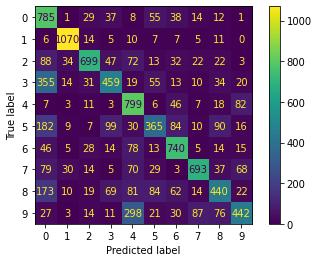

In [21]:
cm = confusion_matrix(np.where(y_test_onehot == 1)[1], np.argmax(y_pred, axis = 1))

ConfusionMatrixDisplay(cm).plot()

In [12]:
from evolutionary_algos import EvoMLPClassifier

classifier = EvoMLPClassifier(n = 48, hidden_layers = [32])
classifier.fit(X_train.reshape(-1, 28 * 28), y_train_onehot, verbose = 1)

Epoch 0 - loss: 16.980144859466414 - 1.058901495012475
Epoch 2 - loss: 8.643307243109149 - 0.14856210551426305
Epoch 3 - loss: 4.841049984696836 - 0.08513569325667386


KeyboardInterrupt: 

In [16]:
import math

class EvoMLPClassifier2:
    '''LATEST VERSION, TESTED WITH MULTICLASS AND BINARY'''

    def __init__(self, n = 24, hidden_layers = False, activation = "relu", lr_target = 0.04, lr_initial_decay = 60, lr_final_decay = 0.03, random_state = None):

        self.n = int(round(n / 8) * 8)
        self.validation_loss_history = []
        self.training_loss_history = []
        self.random_state = random_state
        self.activation = activation
        self.lr_target = lr_target
        self.lr_initial_decay = lr_initial_decay
        self.lr_final_decay = lr_final_decay

        
        if hidden_layers:
            self.hidden_layers = hidden_layers
        else:
            self.hidden_layers = False

        

    def fit(self, X_train, y_train, epochs = 100, validation_data = False, verbose = 0):

        n = self.n
        ndiv4 = n // 4

        if self.random_state != None:
            np.random.seed(self.random_state)

        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        y_train = y_train.astype("int8")

        if len(y_train.shape) == 1:
            self.multiclass = False
        elif len(y_train.shape) == 2 and y_train.shape[1] == 1:
            self.multiclass = False
            y_train = y_train.ravel()
        else:
            self.multiclass = True
            

        if validation_data:
            X_val, y_val = validation_data

        if self.activation == "sigmoid":
            activation_function = lambda x: 1 / (1 + np.exp(-x))
        elif self.activation == "leaky_relu":
            activation_function = lambda x: np.maximum(0.1 * x, x)
        else:
            activation_function = lambda x: np.maximum(0, x)

        if self.multiclass == True:
            output_activation_function = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 2, keepdims = True)
            
            def loss_function(y_train, y_preds):
                return np.mean(np.sum(-y_train * np.log10(y_preds), axis = 2), axis = 1)

        elif self.multiclass == False:
            output_activation_function = lambda x: (1 / (1 + np.exp(-x))).reshape(x.shape[:2])

            def loss_function(y_train, y_preds):
                return np.mean(np.abs(y_preds - y_train), axis = 1)

        lr_target = self.lr_target
        lr_initial_decay = self.lr_initial_decay
        lr_final_decay = self.lr_final_decay

        layers = [X_train.shape[1]]

        if self.hidden_layers:
            layers = [X_train.shape[1]] + self.hidden_layers

        if self.multiclass == True:
            layers = layers + [y_train.shape[1]]
        elif self.multiclass == False:
            layers = layers + [1]

        number_of_layers_minus_one = len(layers) - 1
        
        if self.multiclass == True:
            y_preds = np.zeros((n, y_train.shape[0], y_train.shape[1]))
            #y_preds = np.zeros((n, 1000, y_train.shape[1]))
        elif self.multiclass == False:
            y_preds = np.zeros((n, y_train.shape[0]))
            #y_preds = np.zeros((n, 1000))

        nets_loss = np.zeros(n)
        sorted_indices = np.arange(-(ndiv4), n, 1)
        sorted_indices = np.arange(0, n, 1)

        best_net_index = -1

        weights = []

        for i in range(number_of_layers_minus_one):
            weights += [np.random.normal(0, 1, (n, layers[i], layers[i + 1]))]

        for epoch in range(epochs):
            sample_indices = np.arange(0, X_train.shape[0])
            np.random.shuffle(sample_indices)

            while len(sample_indices) > 0:
                forward_pass = X_train[sample_indices[:1000]].T
                y_train_sampled = y_train[sample_indices[:1000]]

                
                for j in range(number_of_layers_minus_one - 1):
                    forward_pass = activation_function(weights[j].transpose(0, 2, 1) @ forward_pass)
                
                forward_pass = weights[-1].transpose(0, 2, 1) @ forward_pass

                #print(y_preds[sorted_indices[ndiv4:], sample_indices[:1000]].shape)
                
                y_preds[:, sample_indices[:1000]] = output_activation_function(forward_pass.transpose(0, 2, 1))

                nets_loss = loss_function(y_train_sampled, y_preds[:, sample_indices[:1000]])

                sorted_indices = np.argsort(nets_loss)
                mutation_sigma = math.exp(-epoch / (epochs / (lr_initial_decay * math.log10(epochs + 1)))) + lr_final_decay * math.exp(-(epoch + 1) * (1 / (epochs))) + lr_target + (-0.036 * 10 * lr_final_decay)

                for j in range(number_of_layers_minus_one):
                    weights[j][sorted_indices[0 + ndiv4::6]] = (weights[j][sorted_indices[0: ndiv4: 2]] + weights[j][sorted_indices[1: ndiv4: 2]]) / 2 + np.random.normal(0, mutation_sigma, (ndiv4 // 2, layers[j], layers[j + 1]))
                    weights[j][sorted_indices[1 + ndiv4::6]] = (weights[j][sorted_indices[0: ndiv4: 2]] + weights[j][sorted_indices[1: ndiv4: 2]]) / 2 + np.random.normal(0, mutation_sigma, (ndiv4 // 2, layers[j], layers[j + 1]))
                    weights[j][sorted_indices[2 + ndiv4::6]] = (weights[j][sorted_indices[0: ndiv4: 2]] + weights[j][sorted_indices[1: ndiv4: 2]]) / 2 + np.random.normal(0, mutation_sigma, (ndiv4 // 2, layers[j], layers[j + 1]))
                    weights[j][sorted_indices[3 + ndiv4::6]] = (weights[j][sorted_indices[0: ndiv4: 2]] + weights[j][sorted_indices[1: ndiv4: 2]]) / 2 + np.random.normal(0, mutation_sigma, (ndiv4 // 2, layers[j], layers[j + 1]))
                    weights[j][sorted_indices[4 + ndiv4::6]] = (weights[j][sorted_indices[0: ndiv4: 2]] + weights[j][sorted_indices[1: ndiv4: 2]]) / 2 + np.random.normal(0, mutation_sigma, (ndiv4 // 2, layers[j], layers[j + 1]))
                    weights[j][sorted_indices[5 + ndiv4::6]] = (weights[j][sorted_indices[0: ndiv4: 2]] + weights[j][sorted_indices[1: ndiv4: 2]]) / 2 + np.random.normal(0, mutation_sigma, (ndiv4 // 2, layers[j], layers[j + 1]))

                if best_net_index != sorted_indices[0]:
                    best_net_index = sorted_indices[0]
                    self.training_loss_history += [nets_loss[best_net_index]]
                    

                    self.best_net_weights = []
                    for j in range(number_of_layers_minus_one):
                        self.best_net_weights += [weights[j][best_net_index]]
                    
                    if validation_data:
                        self.validation_loss_history += [np.mean(np.abs(y_val - self.predict(X_val)))]
                        if verbose == 1:
                            print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]} - val_loss: {self.validation_loss_history[-1]}")
                    else:
                        if verbose == 1:
                            pass
                            print(f"Epoch {epoch} - loss: {self.training_loss_history[-1]} - {mutation_sigma}")

                sample_indices = sample_indices[1000:]


    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]

        if self.activation == "sigmoid":
            activation_function = lambda x: 1 / (1 + np.exp(-x))
        elif self.activation == "leaky_relu":
            activation_function = lambda x: np.maximum(0.1 * x, x)
        else:
            activation_function = lambda x: np.maximum(0, x)

        if self.multiclass == True:
            output_activation_function = lambda x: np.exp(x) / np.sum(np.exp(x), axis = 1, keepdims = True)

        elif self.multiclass == False:
            output_activation_function = lambda x: (1 / (1 + np.exp(-x))).reshape(x.shape[:1])

        forward_pass = X.T

        for j in range(len(self.best_net_weights) - 1):
            forward_pass = activation_function(self.best_net_weights[j].T @ forward_pass)
            
        forward_pass = self.best_net_weights[-1].T @ forward_pass
            
        return output_activation_function(forward_pass.T)

In [28]:
classifier = EvoMLPClassifier2(n = 48, hidden_layers = [64], lr_final_decay = 0.02)
classifier.fit(X_train.reshape(-1, 28 * 28), y_train_onehot, verbose = 1)

Epoch 0 - loss: 21.532653803242543 - 1.0526009966749834


/var/folders/xz/f2gwbn5n3vs4pz044n49z3cw0000gn/T/ipykernel_94174/4008010066.py:59: RuntimeWarning: divide by zero encountered in log10
  return np.mean(np.sum(-y_train * np.log10(y_preds), axis = 2), axis = 1)
/var/folders/xz/f2gwbn5n3vs4pz044n49z3cw0000gn/T/ipykernel_94174/4008010066.py:59: RuntimeWarning: invalid value encountered in multiply
  return np.mean(np.sum(-y_train * np.log10(y_preds), axis = 2), axis = 1)


Epoch 0 - loss: 20.97788003028498 - 1.0526009966749834
Epoch 0 - loss: 20.628838790201865 - 1.0526009966749834
Epoch 0 - loss: 21.921992156084556 - 1.0526009966749834
Epoch 0 - loss: 20.69549418984626 - 1.0526009966749834
Epoch 0 - loss: 21.3866148273841 - 1.0526009966749834
Epoch 0 - loss: 20.813401859385817 - 1.0526009966749834
Epoch 0 - loss: 21.236465047626382 - 1.0526009966749834
Epoch 0 - loss: 21.634177555154388 - 1.0526009966749834
Epoch 1 - loss: 15.943793939263626 - 0.3528182532662269
Epoch 1 - loss: 10.114678247902196 - 0.3528182532662269
Epoch 1 - loss: 8.708656056186786 - 0.3528182532662269
Epoch 1 - loss: 7.812836795881671 - 0.3528182532662269
Epoch 1 - loss: 7.487338471473155 - 0.3528182532662269
Epoch 1 - loss: 6.664746359108259 - 0.3528182532662269
Epoch 1 - loss: 7.019207760574463 - 0.3528182532662269
Epoch 1 - loss: 6.84077419502375 - 0.3528182532662269
Epoch 1 - loss: 7.053737343784001 - 0.3528182532662269
Epoch 1 - loss: 7.060892147479737 - 0.3528182532662269
Epoch

KeyboardInterrupt: 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       980
           1       0.91      0.93      0.92      1135
           2       0.78      0.77      0.77      1032
           3       0.79      0.80      0.79      1010
           4       0.73      0.80      0.76       982
           5       0.64      0.58      0.61       892
           6       0.80      0.87      0.84       958
           7       0.90      0.74      0.81      1028
           8       0.68      0.65      0.67       974
           9       0.66      0.78      0.71      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



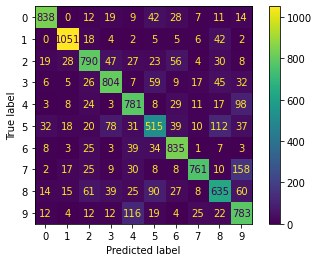

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred = classifier.predict(X_test.reshape(-1, 28 * 28))

y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()